In [1111]:
import pickle

#cargar la lista desde el archivo
with open("DATOS/lista.pkl", "rb") as archivo:
    valor_dict = pickle.load(archivo)
    mapping_dict_Boarding_Area = pickle.load(archivo)
    mapping_dict_Geo_Region = pickle.load(archivo)
    mapping_dict_Geo_Summary = pickle.load(archivo)
    mapping_dict_Month = pickle.load(archivo)
    mapping_dict_Price_Category_Code = pickle.load(archivo)
    mapping_dict_Terminal = pickle.load(archivo)

#invierto el diccionario para poder llamar mas facil a las claves posteriormente
valor_dict_invertido = {valor: clave for clave, valor in valor_dict.items()}
mapping_dict_Boarding_Area_invertido = {valor: clave for clave, valor in mapping_dict_Boarding_Area.items()}
mapping_dict_Geo_Region_invertido = {valor: clave for clave, valor in mapping_dict_Geo_Region.items()}
mapping_dict_Geo_Summary_invertido = {valor: clave for clave, valor in mapping_dict_Geo_Summary.items()}
mapping_dict_Month_invertido = {valor: clave for clave, valor in mapping_dict_Month.items()}
mapping_dict_Price_Category_Code_invertido = {valor: clave for clave, valor in mapping_dict_Price_Category_Code.items()}
mapping_dict_Terminal_invertido = {valor: clave for clave, valor in mapping_dict_Terminal.items()}

# Imprimir los diccionarios
print("valor_dict:", valor_dict)
print("valor_dict_invertido:", valor_dict_invertido)
print("mapping_dict_Boarding_Area:", mapping_dict_Boarding_Area)
print("mapping_dict_Boarding_Area_invertido:", mapping_dict_Boarding_Area_invertido)
print("mapping_dict_Geo_Region:", mapping_dict_Geo_Region)
print("mapping_dict_Geo_Region_invertido:", mapping_dict_Geo_Region_invertido)
print("mapping_dict_Geo_Summary:", mapping_dict_Geo_Summary)
print("mapping_dict_Geo_Summary_invertido:", mapping_dict_Geo_Summary_invertido)
print("mapping_dict_Month:", mapping_dict_Month)
print("mapping_dict_Month_invertido:", mapping_dict_Month_invertido)
print("mapping_dict_Price_Category_Code:", mapping_dict_Price_Category_Code)
print("mapping_dict_Price_Category_Code_invertido:", mapping_dict_Price_Category_Code_invertido)
print("mapping_dict_Terminal:", mapping_dict_Terminal)
print("mapping_dict_Terminal_invertido:", mapping_dict_Terminal_invertido)


valor_dict: {'ATA Airlines': 0, 'Air Canada ': 1, 'Air China': 2, 'Air France': 3, 'Air New Zealand': 4, 'AirTran Airways': 5, 'Alaska Airlines': 6, 'All Nippon Airways': 7, 'American Airlines': 8, 'American Eagle Airlines': 9, 'Asiana Airlines': 10, 'Atlantic Southeast Airlines': 11, 'BelAir Airlines': 12, 'British Airways': 13, 'Cathay Pacific': 14, 'China Airlines': 15, 'Delta Air Lines': 16, 'EVA Airways': 17, 'Frontier Airlines': 18, 'Hawaiian Airlines': 19, 'Horizon Air ': 20, 'Icelandair': 21, 'Independence Air': 22, 'Japan Airlines': 23, 'KLM Royal Dutch Airlines': 24, 'Korean Air Lines': 25, 'Lufthansa German Airlines': 26, 'Mesa Airlines': 27, 'Mexicana Airlines': 28, 'Midwest Airlines': 29, 'Northwest Airlines': 30, 'Philippine Airlines': 31, 'Singapore Airlines': 32, 'SkyWest Airlines': 33, 'Sun Country Airlines': 34, 'TACA': 35, 'US Airways': 36, 'United Airlines': 37, 'United Airlines - Pre 07/01/2013': 38, 'Virgin Atlantic': 39, 'WestJet Airlines': 40, 'Boeing Company': 

In [1112]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

#crear una instancia de SparkSession
spark = SparkSession.builder.getOrCreate()

#cargo el nuevo csv limpio con pyspark, luego lo voy a hacer tambien con Dask
df = spark.read.csv("DATOS/air_traffic_data_limpio.csv", header=True, inferSchema=True)

#media de pasajeros con pysparc
media_pasajeros = df.groupBy("Operating Airline").agg(avg("Passenger Count").alias("MediaPasajeros"))

#muestro el resultado, truncate=False para que no solo me salgan los 20 primeros
media_pasajeros.show(truncate=False)

+-----------------+------------------+
|Operating Airline|MediaPasajeros    |
+-----------------+------------------+
|31               |10248.635658914729|
|65               |2786.011111111111 |
|53               |74405.35359116022 |
|34               |3992.652          |
|28               |7993.806451612903 |
|76               |2834.5            |
|26               |19301.96511627907 |
|27               |3710.5811965811968|
|44               |4991.2164179104475|
|12               |415.3636363636364 |
|22               |6391.3            |
|47               |73.0              |
|1                |18251.560109289618|
|52               |81188.15857605178 |
|13               |17625.124031007752|
|6                |17251.637816245006|
|16               |68498.49740932643 |
|3                |11589.077519379845|
|20               |5577.583333333333 |
|40               |5338.155339805825 |
+-----------------+------------------+
only showing top 20 rows



In [1113]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, stddev


spark = SparkSession.builder.getOrCreate()

#la media y desviación estándar de pasajeros por compañía
media_pasajeros = df.groupBy("Operating Airline").agg(avg("Passenger Count").alias("MediaPasajeros"))
desviacion_pasajeros = df.groupBy("Operating Airline").agg(stddev("Passenger Count").alias("DesviacionPasajeros"))

#el valor de la media y desviación estándar más pequeña
menor_valor_media = media_pasajeros.selectExpr("MIN(MediaPasajeros)").first()[0]
menor_valor_desviacion = desviacion_pasajeros.selectExpr("MIN(DesviacionPasajeros)").first()[0]

# filtro el dataFrame para obtener el registro con la menor MediaPasajeros
menor_registro_media = media_pasajeros.filter(col("MediaPasajeros") == menor_valor_media).first()
aerolinea_menor_media = menor_registro_media["Operating Airline"]

# filtro el dataFrame para obtener el registro con la menor DesviacionPasajeros
menor_registro_desviacion = desviacion_pasajeros.filter(col("DesviacionPasajeros") == menor_valor_desviacion).first()
aerolinea_menor_desviacion = menor_registro_desviacion["Operating Airline"]

#el valor de la media y desviación estándar más grande
mayor_valor_media = media_pasajeros.selectExpr("MAX(MediaPasajeros)").first()[0]
mayor_valor_desviacion = desviacion_pasajeros.selectExpr("MAX(DesviacionPasajeros)").first()[0]

#filtro el DataFrame para obtener el registro con la mayor MediaPasajeros
mayor_registro_media = media_pasajeros.filter(col("MediaPasajeros") == mayor_valor_media).first()
aerolinea_mayor_media = mayor_registro_media["Operating Airline"]

#filtrar el dataFrame para obtener el registro con la mayor DesviacionPasajeros
mayor_registro_desviacion = desviacion_pasajeros.filter(col("DesviacionPasajeros") == mayor_valor_desviacion).first()
aerolinea_mayor_desviacion = mayor_registro_desviacion["Operating Airline"]

print("Media de Pasajeros más Pequeña:", menor_valor_media, "(Aerolínea correspondiente:", valor_dict_invertido[aerolinea_menor_media], ")")
print("Desviación Estándar más Pequeña:", menor_valor_desviacion, "(Aerolínea correspondiente:", valor_dict_invertido[aerolinea_menor_desviacion], ")")
print("Media de Pasajeros más Grande:", mayor_valor_media, "(Aerolínea correspondiente:", valor_dict_invertido[aerolinea_mayor_media], ")")
print("Desviación Estándar más Grande:", mayor_valor_desviacion, "(Aerolínea correspondiente:", valor_dict_invertido[aerolinea_mayor_desviacion], ")")


Media de Pasajeros más Pequeña: 2.0 (Aerolínea correspondiente: Evergreen International Airlines )
Desviación Estándar más Pequeña: 0.0 (Aerolínea correspondiente: Xtra Airways )
Media de Pasajeros más Grande: 127164.38970588235 (Aerolínea correspondiente: American Airlines )
Desviación Estándar más Grande: 111407.6096590275 (Aerolínea correspondiente: United Airlines )


In [1114]:
#CONCLUSIONES:
#compruebo cuantos vuelos han salido de Xtra Airways ya que la desviacion estandar es 0 y eso es bastante extraño
import dask.dataframe as dd

df = dd.read_csv("DATOS/air_traffic_data_limpio.csv")

cantidad_operating_airlines = (df["Operating Airline"] == valor_dict["Xtra Airways"]).sum().compute()

print(f"Hay {cantidad_operating_airlines} vuelos registrados de la compañía Xtra Airways, por eso mismo la desviación estándar es de 0, porque los dos vuelos tienen la misma cantidad de pasajeros")

#así mismo, si compruebo la cantidad de vuelos de American Airlines seguro que es más grande ya que tiene una desviación estándar elevada

cantidad_operating_airlines = (df["Operating Airline"] == valor_dict["United Airlines"]).sum().compute()

print(f"Hay {cantidad_operating_airlines} vuelos registrados de la compañía United Airlines, tiene sentido que haya tantos ya que tiene una alta desviación estándar")


Hay 2 vuelos registrados de la compañía Xtra Airways, por eso mismo la desviación estándar es de 0, porque los dos vuelos tienen la misma cantidad de pasajeros
Hay 892 vuelos registrados de la compañía United Airlines, tiene sentido que haya tantos ya que tiene una alta desviación estándar


In [1115]:
#Compruebo el precio medio de los 2 vuelos de XtraAirways y veo que son de 1.0, es decir muy caro, tiene sentido que haya tantos vuelos
media_precio_compania = df[df["Operating Airline"] == valor_dict["Xtra Airways"]]["Price Category Code"].mean().compute()

print(f"Precio medio de los vuelos de Xtra Airways: {media_precio_compania} que es: {mapping_dict_Price_Category_Code_invertido[media_precio_compania]}")



Precio medio de los vuelos de Xtra Airways: 1.0 que es: Other


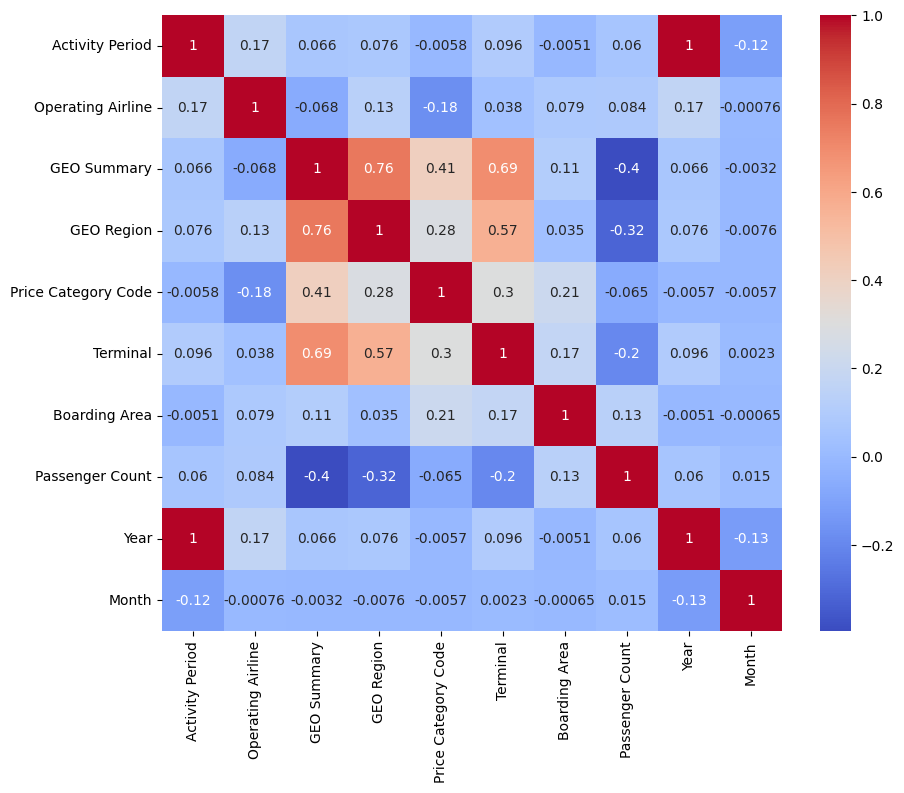

In [1116]:
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación y computarla
matriz_correlacion = df.corr().compute()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", ax=ax)

# Guardar la figura como imagen PNG
plt.savefig("Graficos/Matriz_Correlacion.png")


In [1117]:
print(matriz_correlacion)

                     Activity Period  Operating Airline  GEO Summary  \
Activity Period             1.000000           0.168704     0.066100   
Operating Airline           0.168704           1.000000    -0.067780   
GEO Summary                 0.066100          -0.067780     1.000000   
GEO Region                  0.075646           0.130437     0.756758   
Price Category Code        -0.005754          -0.175135     0.411498   
Terminal                    0.096473           0.038210     0.692937   
Boarding Area              -0.005123           0.079325     0.109553   
Passenger Count             0.060311           0.084493    -0.395743   
Year                        0.999940           0.168485     0.066046   
Month                      -0.116571          -0.000757    -0.003234   

                     GEO Region  Price Category Code  Terminal  Boarding Area  \
Activity Period        0.075646            -0.005754  0.096473      -0.005123   
Operating Airline      0.130437            -0

In [1118]:

print("\n-----CONCLUSIONES DE CORRELACION-----")

print("\nActivity Period y Year tienen una correlación positiva muy alta de 0.999940 que indica una fuerte relación entre estos dos atributos. Esto sugiere que el período de actividad y el año están estrechamente relacionados en los datos.")

print("\nOperating Airline y GEO Summary tienen una correlación negativa moderada de -0.067780. Esto indica que hay una relación inversa entre la aerolínea operativa y el resumen geográfico. Es decir, ciertos resúmenes geográficos pueden estar asociados con aerolíneas específicas.")

print("\nGEO Summary y GEO Region tienen una correlación positiva alta de 0.756758. Esto sugiere que el resumen geográfico y la región geográfica están relacionados de manera significativa. Es decir, ciertos resúmenes geográficos están asociados con regiones específicas.")

print("\nPassenger Count y GEO Summary tienen una correlación negativa moderada de -0.395743. Esto indica que ciertos resúmenes geográficos pueden tener una influencia en la cantidad de pasajeros")


-----CONCLUSIONES DE CORRELACION-----

Activity Period y Year tienen una correlación positiva muy alta de 0.999940 que indica una fuerte relación entre estos dos atributos. Esto sugiere que el período de actividad y el año están estrechamente relacionados en los datos.

Operating Airline y GEO Summary tienen una correlación negativa moderada de -0.067780. Esto indica que hay una relación inversa entre la aerolínea operativa y el resumen geográfico. Es decir, ciertos resúmenes geográficos pueden estar asociados con aerolíneas específicas.

GEO Summary y GEO Region tienen una correlación positiva alta de 0.756758. Esto sugiere que el resumen geográfico y la región geográfica están relacionados de manera significativa. Es decir, ciertos resúmenes geográficos están asociados con regiones específicas.

Passenger Count y GEO Summary tienen una correlación negativa moderada de -0.395743. Esto indica que ciertos resúmenes geográficos pueden tener una influencia en la cantidad de pasajeros


             Feature  Importance
1  Operating Airline    0.758290
6    Passenger Count    0.086794
2        GEO Summary    0.073255
0    Activity Period    0.029546
5      Boarding Area    0.022826
4           Terminal    0.022809
8              Month    0.003835
7               Year    0.001556
3         GEO Region    0.001088


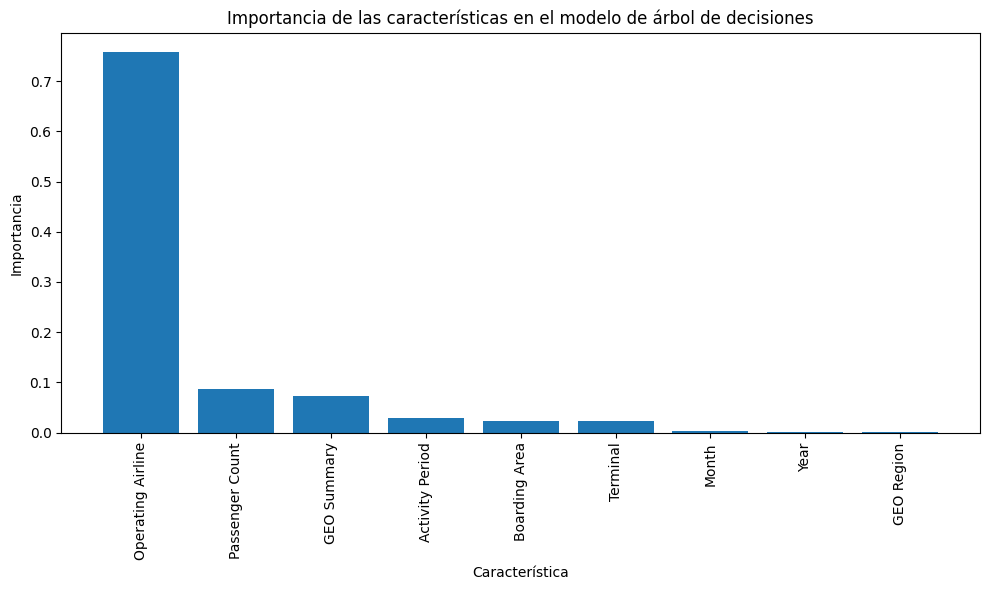

In [1120]:
import pandas as pd
import dask.dataframe as dd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_pandas = df.compute()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_pandas.drop("Price Category Code", axis=1), df_pandas["Price Category Code"], test_size=0.2)

# Entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Calcular la puntuación F1
f1 = f1_score(y_test, y_pred)

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred)

# Crear un dataframe con la importancia de cada característica
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importance})

# Ordenar el dataframe por importancia descendente
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Imprimir los resultados
print(importance_df)

# Plotear el gráfico de barras de las importancias
plt.figure(figsize=(10, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xticks(rotation=90)
plt.xlabel("Característica")
plt.ylabel("Importancia")
plt.title("Importancia de las características en el modelo de árbol de decisiones")
plt.tight_layout()

# Guardar el gráfico como un archivo PNG
plt.savefig("Graficos/Importancia_caracteristicas_arbol_decision.png")

# Mostrar el gráfico en la ventana


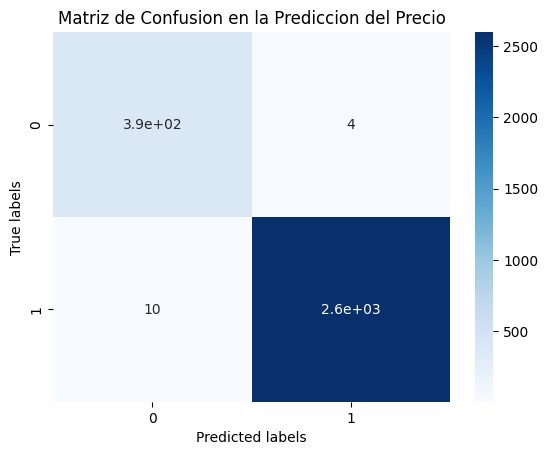

In [1121]:
# Obtener la matriz de confusión
matrix = confusion_matrix(y_test, y_pred)

importance = model.feature_importances_


sns.heatmap(matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Matriz de Confusion en la Prediccion del Precio")


plt.savefig("Graficos/Matriz_Confusion_Prediccion_Precio.png")

plt.show()


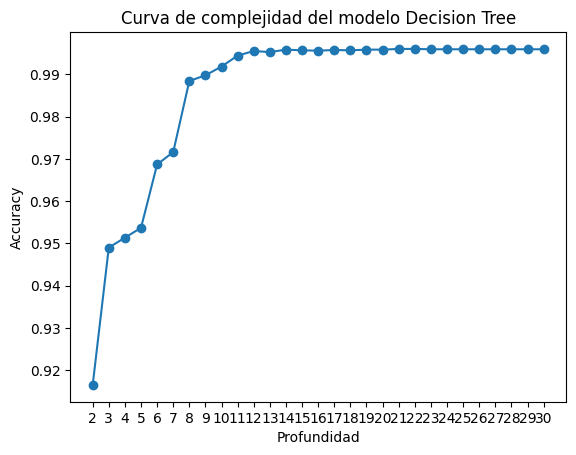

El valor óptimo de la profundidad del árbol es: 21


In [1122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir rango de profundidades
depths = range(2, 31)

# Crear modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=100)

# Definir parámetros de GridSearchCV
param_grid = {"max_depth": depths}

# Realizar GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Guardar resultados de GridSearchCV
results = grid_search.cv_results_

# Obtener los valores de los parámetros y el score
params = results["params"]
scores = results["mean_test_score"]

# Crear gráfica de curva de complejidad
plt.plot(depths, scores, "-o")
plt.xlabel("Profundidad")
plt.ylabel("Accuracy")
plt.title("Curva de complejidad del modelo Decision Tree")
plt.xticks(depths)

plt.savefig("Graficos/Curva de complejidad de arbol de decision.png")

plt.show()

# Obtener mejor valor de profundidad del árbol
best_depth = grid_search.best_params_["max_depth"]
print("El valor óptimo de la profundidad del árbol es:", best_depth)



In [1127]:
import pandas as pd
import dask.dataframe as dd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Convert Dask DataFrame to Pandas DataFrame
df_pandas = df.compute()  

# Dividir los datos en características (X) y etiquetas (y)
X = df_pandas.drop('Price Category Code', axis=1)
y = df_pandas['Price Category Code']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Crear el modelo de bosque de decisiones
model = RandomForestRegressor(max_depth=24, random_state=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)

# Imprimir el error absoluto medio
print('Error absoluto medio:', mae)


Error absoluto medio: 0.003972906950921609


In [1128]:
print("\n-----CONCLUSIONES ENTRE ARBOL Y BOSQUE DE DECISION-----")

print("Haciendo unRandom Forest de profundidad 24 (la óptima) cometo mas error las siguientes razones:\n ")
print("Cuando los datos son simples, un árbol de decisión individual puede ser suficiente para capturar las relaciones \nlineales o patrones directos en los datos. Un Random Forest, al ser una combinación de múltiples árboles, puede agregar cierta complejidad \nadicional y, en algunos casos, conducir a un rendimiento similar o ligeramente peor en comparación con un árbol de decisión individual.")




-----CONCLUSIONES ENTRE ARBOL Y BOSQUE DE DECISION-----
Haciendo unRandom Forest de profundidad 24 (la optima) cometo mas error las siguientes razones:
 
Cuando los datos son simples, un árbol de decisión individual puede ser suficiente para capturar las relaciones 
lineales o patrones directos en los datos. Un Random Forest, al ser una combinación de múltiples árboles, puede agregar cierta complejidad 
adicional y, en algunos casos, conducir a un rendimiento similar o ligeramente peor en comparación con un árbol de decisión individual.
